# Genius Lyric Analysis
[link to download the kaggle dataset](https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information/data)

In [29]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## Loading Dataset

In [ ]:
df = pd.read_csv("dataset.csv")
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


## Data Cleaning

In [24]:
print("Missing data points for every category:")
df.isnull().sum().sort_values(ascending=False)

Missing data points for every category:


language         226918
language_ft      134322
language_cld3     90966
title               188
tag                   0
artist                0
year                  0
lyrics                0
features              0
views                 0
id                    0
dtype: int64

In [25]:
# Find and filter out data with no language tag
df['language'] = df['language'].fillna(df['language_ft'])
df['language'] = df['language'].fillna(df['language_cld3'])
# print(df['language'].isnull().sum())
df = df[df['language'].notnull()]

# Change null title data to unknown. We don't necessarily need to drop them
df['title'] = df['title'].fillna('Unknown')
df

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
5134851,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,7882842,en,en,en
5134852,64 Bars,rap,Rapido,2022,4,{},"[Intro]\n\nJa, ja\n\n[Part 1]\n\nR-A-H, Merhab...",7882843,de,de,de
5134853,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en,en,en
5134854,CEO,rap,Antropolita,2022,5,{},Jestem CEO w tym\nTo jara twoją bitch\nNikt na...,7882846,pl,pl,pl


In [26]:
df['word_count'] = df['lyrics'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['lyrics'].apply(lambda x: len(set(x.split())))
df['vocab_richness'] = df['unique_word_count'] / df['word_count']
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,word_count,unique_word_count,vocab_richness
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en,762,350,0.459318
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en,548,348,0.635036
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en,574,324,0.564460
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en,760,383,0.503947
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en,432,255,0.590278


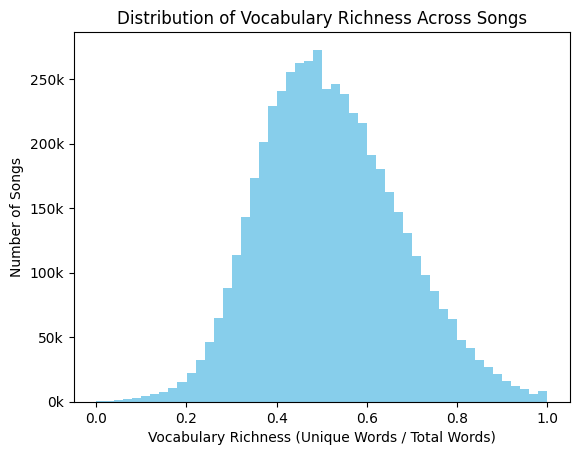

In [36]:
def thousands(x, pos):
    return f'{int(x/1000)}k'

plt.hist(df['vocab_richness'], bins=50, color='skyblue')
plt.xlabel('Vocabulary Richness (Unique Words / Total Words)')
plt.ylabel('Number of Songs')
plt.title('Distribution of Vocabulary Richness Across Songs')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(thousands))
plt.show()